In [37]:
import numpy as np
import pandas as pd
#install lightgbm from conda first

from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

import shelve
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
sns.set()
warnings.filterwarnings('ignore')

In [38]:
def shelf_read(filename):

    my_shelf = shelve.open(filename)
    for key in my_shelf:
        print(key)
        globals()[key]=my_shelf[key]
    my_shelf.close()

In [ ]:
# save predicted values
product_list = ['SMAP', 'SMOS', 'AS', 'A2']
model_list = ['SVR_Ridge_Lasso','LGBM','XGB']

for mi in range(0,4):
    
    model = model_list[mi]
    
    for pi in range(0,4):
        
        product = product_list[pi]
        pr_file   = "/home/hyung/Lab/data/DL_Error/"+product+"_selected_predictors.csv"
        pr_data   = pd.read_csv(pr_file)
        pr_data.drop(columns=['ltype'], inplace=True)

        selected_predictors = list(pr_data.columns.values)

        all_predictors = pr_data.columns.values

        # Standardize numeric/response columns, to mean 0 variance 1
        pr_data_mean   = pr_data.mean()
        pr_data_std    = pr_data.std()
        pr_data_scaled = np.array((pr_data - pr_data_mean) / pr_data_std)

        print(model+'_'+product)
        ofp = '/home/hyung/Lab/libs/python/DL_Error_data/'+product
        shelf_read(ofp+'_'+model+'.out')
        
        if mi == 0:
            y_pred = grid_SVR.predict(pr_data_scaled)
        else:
            y_pred = grid.predict(pr_data_scaled)

        ofp_result = '/home/hyung/Lab/libs/python/DL_Error_results/ML_model_predictions/'
        np.savetxt(ofp_result+model_list[mi]+'_'+product_list[pi]+'.csv', y_pred, delimiter=',')

SVR_Ridge_Lasso_SMAP
grid_SVR
model_Ridge
model_Lasso
model_LassoCV
all_pred
X_test
y_test
SVR_Ridge_Lasso_SMOS
grid_SVR
model_Ridge
model_Lasso
model_LassoCV
all_pred
X_test
y_test
SVR_Ridge_Lasso_AS
grid_SVR
model_Ridge
model_Lasso
model_LassoCV
all_pred
X_test
y_test
SVR_Ridge_Lasso_A2
grid_SVR
model_Ridge
model_Lasso
model_LassoCV
all_pred
X_test
y_test


(array([2.0000e+00, 9.0000e+00, 1.9700e+02, 3.3705e+04, 2.0618e+04,
        4.2700e+02, 5.8000e+01, 1.2000e+01, 3.0000e+00, 1.0000e+00]),
 array([-0.78652946, -0.46610118, -0.1456729 ,  0.17475537,  0.49518365,
         0.81561193,  1.13604021,  1.45646848,  1.77689676,  2.09732504,
         2.41775332]),
 <BarContainer object of 10 artists>)

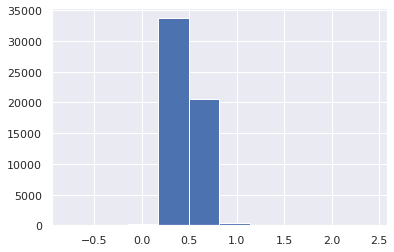

In [33]:
plt.hist(y_pred)